In [1]:
from netgen.meshing import *
from netgen.csg import *
from netgen.occ import *
from ngsolve import *
from ngsolve.webgui import Draw

#import math
class CubeMesh():
    def __init__(self,  **kwargs):  
        self.SetMesh(**kwargs)

    def SetMesh(self, **kwargs):
        default_values = {"name":"Cube",
                          "mur":1000, 
                          "msize": meshsize.moderate,
                          "ndiv":5,
                          "type":0,
                          "curveOrder":1,
                          "rKelvin":5
                         }
        
        default_values.update(kwargs)
        self.name=default_values["name"]
        self.mur=default_values["mur"]
        self.msize=default_values["msize"]
        ndiv=default_values["ndiv"]
        type=default_values["type"]
        curveOrder=default_values["curveOrder"]   
        rKelvin=default_values["rKelvin"]   
        self.curveOrder=curveOrder
        self.rKelvin=rKelvin
        
        iron = Box((0,0,0),(1, 1, 1))
        iron.faces.Min(X).name="Bn0"
        iron.faces.Min(Y).name="Bn0"
        iron.faces.Min(Z).name="Ht0"
        if type==1:
            iron.faces.Max(X).name="A_Omega_boundary"
            iron.faces.Max(Y).name="A_Omega_boundary"
            iron.faces.Max(Z).name="A_Omega_boundary"
        iron.mat("iron")
        #iron.maxh=1.0/ndiv
 
        A_domain = Box((0,0,0),(1.2, 1.2, 1.2))
        #A_domain.faces.Min(Z).Identify(A_domain.faces.Max(Z), "bot-top", type=IdentificationType.CLOSESURFACES)

        A_domain.faces.Min(X).name="Bn0"
        A_domain.faces.Min(Y).name="Bn0"
        A_domain.faces.Min(Z).name="Ht0"
        if type==0:
            A_domain.faces.Max(X).name="A_Omega_boundary"
            A_domain.faces.Max(Y).name="A_Omega_boundary"
            A_domain.faces.Max(Z).name="A_Omega_boundary"
            A_domain.mat("A_domain")
        elif type==1:
            A_domain.mat("Omega_domain")
        #A_domain.maxh=1.0/ndiv


        rk=rKelvin
        Omega_domain=Sphere(Pnt(0,0,0.0), r=rk)*Box((0,0,0), (rk,rk,rk))
        #Omega_domain.faces[0].Identify(Omega_domain.faces[4], "ud0",  IdentificationType.PERIODIC)
        Omega_domain.faces.Min(X).name="Bn0"
        Omega_domain.faces.Min(Y).name="Bn0"
        Omega_domain.faces.Min(Z).name="Ht0"
        #Omega_domain.faces.Max(Y).name="Omega0"
        #Omega_domain.faces.Max(X).name="Omega0"
        #Omega_domain.faces.Max(Z).name="Omega0"
        #Omega_domain.faces.Min(Z).Identify(Omega_domain.faces.Max(Z), "bot-top", type=IdentificationType.CLOSESURFACES)
        Omega_domain.mat("Omega_domain")
        Omega_domain.maxh=rk/5

        rk=rKelvin
        center=rk*2
        external_domain = Sphere(Pnt(center,0,0.), r=rk)*Box((center,0,0), (center+rk,rk,rk))
        external_domain.faces.Min(X).name="Bn0"
        external_domain.faces.Min(Y).name="Bn0"
        external_domain.faces.Min(Z).name="Ht0"
        external_domain.mat("Kelvin")
        external_domain.maxh=rk/5

        external_domain.faces[0].Identify(Omega_domain.faces[0], "ud0",  IdentificationType.PERIODIC)
        
        geo=Glue([iron, A_domain, Omega_domain, external_domain])
        
        occgeo =OCCGeometry(geo)
        #ngmesh = occgeo.GenerateMesh(self.msize, quad_dominated=False)
        #ngmesh = occgeo.GenerateMesh(grading=0.05)
        ngmesh = occgeo.GenerateMesh(self.msize)
        #ngmesh.ZRefine("bot-top", [])
        print("curveOrder=", curveOrder)
        mesh = Mesh(ngmesh).Curve(curveOrder)

        self.geo=geo
        self.mesh=mesh
        if type==0:
            self.reduced_region="Omega_domain"
            self.total_region="iron|A_domain"
        elif type==1:
            self.reduced_region="A_domain|Omega_domain"
            self.total_region="iron"           
        self.total_boundary="A_Omega_boundary"
        self.reduced_boundary="Omega0"
        self.Bn0_boundary="Bn0"
        self.Ht0_boundary="Ht0"

        import math
        mur=self.mur
        mu0=4.e-7*math.pi
        mu=mu0*mur
        mu_d={"iron":mu,  "A_domain":mu0, "Omega_domain":mu0,"Kelvin":mu0, 'default':mu0}
        self.Mu = CoefficientFunction([mu_d[mat] for mat in mesh.GetMaterials()])  # デフォルトの物性値
        
        print("nv=", mesh.nv, " nedge=", mesh.nedge, " nfacet=", mesh.nfacet, " ne=",mesh.ne)

    def Print(self):
        geo=self.geo
        mesh=self.mesh
        print("Model:", self.name, "mur=", self.mur)
        print("nv=", mesh.nv, " nedge=", mesh.nedge, " nfacet=", mesh.nfacet, " ne=",mesh.ne)
        for s in geo.solids:
            print("name:",s.name, "  mass:", s.mass, "  center:", s.center)



In [2]:
from netgen.meshing import *
from netgen.csg import *
from netgen.occ import *
from ngsolve import *
from ngsolve.webgui import Draw

#import math
class SphereMesh():
    def __init__(self,  **kwargs):  
        self.SetMesh(**kwargs)

    def SetMesh(self, **kwargs):
        default_values = {"name":"Cube",
                          "mur":1000, 
                          "sigma": 5.e7,
                          "msize": meshsize.moderate,
                          "ndiv":5,
                          "type":0,
                          "curveOrder":1,
                          "rKelvin":5
                         }
        
        default_values.update(kwargs)
        self.name=default_values["name"]
        self.mur=default_values["mur"]
        self.sigma=default_values["sigma"]
        self.msize=default_values["msize"]
        ndiv=default_values["ndiv"]
        type=default_values["type"]
        curveOrder=default_values["curveOrder"]   
        rKelvin=default_values["rKelvin"]   
        self.curveOrder=curveOrder
        self.rKelvin=rKelvin
        
        iron = Sphere(Pnt(0,0,0.0), r=1)*Box((0,0,0), (1,1,1))
        iron.faces.Min(X).name="Bn0"
        iron.faces.Min(Y).name="Bn0"
        iron.faces.Min(Z).name="Ht0"
        if type==1:
            iron.face[0].name="A_Omega_boundary"
        iron.mat("iron")
        #iron.maxh=1.0/ndiv
 
        A_domain =  Sphere(Pnt(0,0,0.0), r=1.5)*Box((0,0,0), (1.5,1.5,1.5))
        #A_domain.faces.Min(Z).Identify(A_domain.faces.Max(Z), "bot-top", type=IdentificationType.CLOSESURFACES)

        A_domain.faces.Min(X).name="Bn0"
        A_domain.faces.Min(Y).name="Bn0"
        A_domain.faces.Min(Z).name="Ht0"
        if type==0:
            A_domain.faces[0].name="A_Omega_boundary"
            A_domain.mat("A_domain")
        elif type==1:
            A_domain.mat("Omega_domain")
        #A_domain.maxh=1.0/ndiv

        rk=rKelvin
        Omega_domain=Sphere(Pnt(0,0,0.0), r=rk)*Box((0,0,0), (rk,rk,rk))
        #Omega_domain.faces[0].Identify(Omega_domain.faces[4], "ud0",  IdentificationType.PERIODIC)
        Omega_domain.faces.Min(X).name="Bn0"
        Omega_domain.faces.Min(Y).name="Bn0"
        Omega_domain.faces.Min(Z).name="Ht0"
        #Omega_domain.faces.Max(Y).name="Omega0"
        #Omega_domain.faces.Max(X).name="Omega0"
        #Omega_domain.faces.Max(Z).name="Omega0"
        #Omega_domain.faces.Min(Z).Identify(Omega_domain.faces.Max(Z), "bot-top", type=IdentificationType.CLOSESURFACES)
        Omega_domain.mat("Omega_domain")
        #Omega_domain.maxh=rk/5

        rk=rKelvin
        center=rk*2
        external_domain = Sphere(Pnt(center,0,0.), r=rk)*Box((center,0,0), (center+rk,rk,rk))
        external_domain.faces.Min(X).name="Bn0"
        external_domain.faces.Min(Y).name="Bn0"
        external_domain.faces.Min(Z).name="Ht0"
        external_domain.mat("Kelvin")
        #external_domain.maxh=rk/5

        external_domain.faces[0].Identify(Omega_domain.faces[0], "ud0",  IdentificationType.PERIODIC)
        
        geo=Glue([iron, A_domain, Omega_domain, external_domain])
        
        occgeo =OCCGeometry(geo)
        #ngmesh = occgeo.GenerateMesh(self.msize, quad_dominated=False)
        #ngmesh = occgeo.GenerateMesh(grading=0.05)
        ngmesh = occgeo.GenerateMesh(self.msize)
        #ngmesh.ZRefine("bot-top", [])
        print("curveOrder=", curveOrder)
        mesh = Mesh(ngmesh).Curve(curveOrder)

        self.geo=geo
        self.mesh=mesh
        if type==0:
            self.reduced_region="Omega_domain"
            self.total_region="iron|A_domain"
        elif type==1:
            self.reduced_region="A_domain|Omega_domain"
            self.total_region="iron"           
        self.total_boundary="A_Omega_boundary"
        self.reduced_boundary="Omega0"
        self.Bn0_boundary="Bn0"
        self.Ht0_boundary="Ht0"

        import math
        mur=self.mur
        mu0=4.e-7*math.pi
        mu=mu0*mur
        mu_d={"iron":mu,  "A_domain":mu0, "Omega_domain":mu0,"Kelvin":mu0, 'default':mu0}
        self.Mu = CoefficientFunction([mu_d[mat] for mat in mesh.GetMaterials()])  # デフォルトの物性値
        mu_sigma={"iron":self.sigma,  "A_domain":0, "Omega_domain":0,"Kelvin":0, 'default':0}
        self.Sigma = CoefficientFunction([mu_sigma[mat] for mat in mesh.GetMaterials()])  # デフォルトの物性値
        
        print("nv=", mesh.nv, " nedge=", mesh.nedge, " nfacet=", mesh.nfacet, " ne=",mesh.ne)

    def Print(self):
        geo=self.geo
        mesh=self.mesh
        print("Model:", self.name, "mur=", self.mur)
        print("nv=", mesh.nv, " nedge=", mesh.nedge, " nfacet=", mesh.nfacet, " ne=",mesh.ne)
        for s in geo.solids:
            print("name:",s.name, "  mass:", s.mass, "  center:", s.center)

curveOrder= 3
nv= 105  nedge= 434  nfacet= 570  ne= 239


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

enter iccg_solve
Dof= 3286    Nonzeros= 148770
shift parameter= 1.0
minimum residual= 7.508637077399819e-09  at iteraions:  42


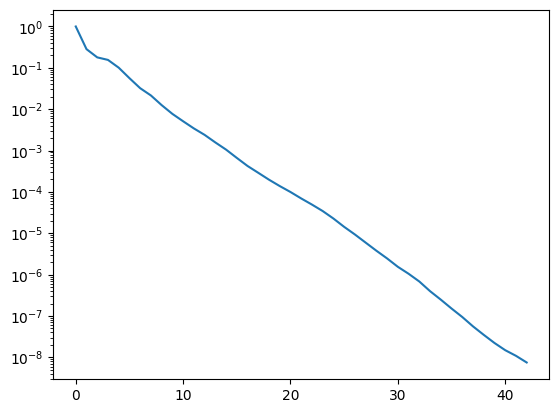

ICCG calculation time (sec): 0.018024699995294213
*** Ar ***


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

feOrder= 3    ndof= 4001   
center magnetic field =  (-0.002048108532713967, -2.7847990496655162e-14, 2.9927994443669097)   
magnetic energy= 1866.000145462595   
**** B field ****


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

経過時間: 0.7010 秒  


In [3]:
from ngsolve import *
from netgen.occ import *
from ngsolve.webgui import Draw
from netgen.webgui import Draw as DrawGeo  
sys.path.append(r'..\Static') 
from Omega_ReducedOmega import Omega_ReducedOmega_Method
from A_ReducedOmega import A_ReducedOmega_Method
from A_ReducedA import A_ReducedA_Method
sys.path.append(r'..\bin\Release') 
from EMPY_Field import *

coil=UNIF(0,0,1,0)
#model=CubeMesh(msize=meshsize.coarse, curveOrder=3, rKelvin=5)
model=SphereMesh(sigma=5.e7, msize=meshsize.coarse, curveOrder=3, rKelvin=2)
mesh=model.mesh
Draw(mesh)


feOrder=3
#cal=Omega_ReducedOmega_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0", Kelvin="on")
cal=A_ReducedA_Method(model, coil, feOrder=feOrder, Kelvin="on")
#maxerror, error=cal.CalcError()

In [4]:
"""
iter=0
for iter in range(6):
#while cal.fes.ndof < 100000:
    iter=iter+1
    print("Adaptive iteration: ",iter) 
    maxerror, error=cal.CalcError()
    cal.Refine(maxerror, error)
    Draw(mesh)
    cal=A_ReducedA_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0", Kelvin="on")
    #cal=Omega_ReducedOmega_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0")
"""

'\niter=0\nfor iter in range(6):\n#while cal.fes.ndof < 100000:\n    iter=iter+1\n    print("Adaptive iteration: ",iter) \n    maxerror, error=cal.CalcError()\n    cal.Refine(maxerror, error)\n    Draw(mesh)\n    cal=A_ReducedA_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0", Kelvin="on")\n    #cal=Omega_ReducedOmega_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0")\n'